In [89]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.style as sty
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Предобработка данных

In [4]:
df = pd.read_csv('weatherAUS.csv')

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [7]:
df['RISK_MM'].value_counts()

0.0      91077
0.2       8762
0.4       3781
0.6       2591
0.8       2055
         ...  
106.0        1
170.4        1
90.0         1
172.2        1
74.4         1
Name: RISK_MM, Length: 681, dtype: int64

In [8]:
df = df.drop(columns=['Location','Date','Evaporation','Sunshine','Cloud3pm','Cloud9am','RISK_MM'],axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        141556 non-null  float64
 1   MaxTemp        141871 non-null  float64
 2   Rainfall       140787 non-null  float64
 3   WindGustDir    132863 non-null  object 
 4   WindGustSpeed  132923 non-null  float64
 5   WindDir9am     132180 non-null  object 
 6   WindDir3pm     138415 non-null  object 
 7   WindSpeed9am   140845 non-null  float64
 8   WindSpeed3pm   139563 non-null  float64
 9   Humidity9am    140419 non-null  float64
 10  Humidity3pm    138583 non-null  float64
 11  Pressure9am    128179 non-null  float64
 12  Pressure3pm    128212 non-null  float64
 13  Temp9am        141289 non-null  float64
 14  Temp3pm        139467 non-null  float64
 15  RainToday      140787 non-null  object 
 16  RainTomorrow   142193 non-null  object 
dtypes: float64(12), object(5)
mem

In [10]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        141556 non-null  float64
 1   MaxTemp        141871 non-null  float64
 2   Rainfall       140787 non-null  float64
 3   WindGustDir    132863 non-null  object 
 4   WindGustSpeed  132923 non-null  float64
 5   WindDir9am     132180 non-null  object 
 6   WindDir3pm     138415 non-null  object 
 7   WindSpeed9am   140845 non-null  float64
 8   WindSpeed3pm   139563 non-null  float64
 9   Humidity9am    140419 non-null  float64
 10  Humidity3pm    138583 non-null  float64
 11  Pressure9am    128179 non-null  float64
 12  Pressure3pm    128212 non-null  float64
 13  Temp9am        141289 non-null  float64
 14  Temp3pm        139467 non-null  float64
 15  RainToday      140787 non-null  float64
 16  RainTomorrow   142193 non-null  int64  
dtypes: float64(13), int64(1), obj

In [15]:
df.shape

(142193, 17)

In [21]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [22]:
df.shape

(112925, 17)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112925 entries, 0 to 142192
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        112925 non-null  float64
 1   MaxTemp        112925 non-null  float64
 2   Rainfall       112925 non-null  float64
 3   WindGustDir    112925 non-null  object 
 4   WindGustSpeed  112925 non-null  float64
 5   WindDir9am     112925 non-null  object 
 6   WindDir3pm     112925 non-null  object 
 7   WindSpeed9am   112925 non-null  float64
 8   WindSpeed3pm   112925 non-null  float64
 9   Humidity9am    112925 non-null  float64
 10  Humidity3pm    112925 non-null  float64
 11  Pressure9am    112925 non-null  float64
 12  Pressure3pm    112925 non-null  float64
 13  Temp9am        112925 non-null  float64
 14  Temp3pm        112925 non-null  float64
 15  RainToday      112925 non-null  float64
 16  RainTomorrow   112925 non-null  int64  
dtypes: float64(13), int64(1), obj

In [26]:
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
df = pd.get_dummies(df, columns=categorical_columns)

In [27]:
df.shape

(112925, 62)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112925 entries, 0 to 142192
Data columns (total 62 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MinTemp          112925 non-null  float64
 1   MaxTemp          112925 non-null  float64
 2   Rainfall         112925 non-null  float64
 3   WindGustSpeed    112925 non-null  float64
 4   WindSpeed9am     112925 non-null  float64
 5   WindSpeed3pm     112925 non-null  float64
 6   Humidity9am      112925 non-null  float64
 7   Humidity3pm      112925 non-null  float64
 8   Pressure9am      112925 non-null  float64
 9   Pressure3pm      112925 non-null  float64
 10  Temp9am          112925 non-null  float64
 11  Temp3pm          112925 non-null  float64
 12  RainToday        112925 non-null  float64
 13  RainTomorrow     112925 non-null  int64  
 14  WindGustDir_E    112925 non-null  uint8  
 15  WindGustDir_ENE  112925 non-null  uint8  
 16  WindGustDir_ESE  112925 non-null  uint

In [53]:
X.shape

(112925, 61)

In [50]:
X = df.loc[:,df.columns!='RainTomorrow']
y = df['RainTomorrow']

# Создание трейновой и тестовой выборок

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23, shuffle = False)

# Метод ближайших соседей

In [66]:
n_nb = range(5, 30)
res = []

for i in n_nb: 
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)

  prediction = neigh.predict(X_test)

  res.append((np.mean(prediction == y_test)))

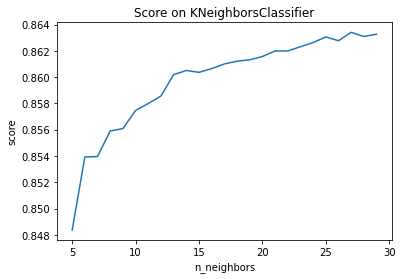

In [67]:
plt.plot(n_nb, res)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.title("Score on KNeighborsClassifier")
plt.show()

In [84]:
%%time
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(X_train, y_train)

prediction = neigh.predict(X_test)

Wall time: 54.1 s


In [85]:
np.mean(prediction == y_test)

0.8615755171436668

# Наивный Байес

In [87]:
%%time
classifier = GaussianNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

Wall time: 220 ms


In [88]:
np.mean(prediction == y_test)

0.8051501841881553

# Логистическая регрессия

In [90]:
%%time
classifier = LogisticRegression(penalty =  'l2', max_iter = 5000)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

Wall time: 21.3 s


In [91]:
np.mean(prediction == y_test)

0.8697931425332955